<a href="https://colab.research.google.com/github/AkshayN1097/ISYS5002/blob/main/10_NLP_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural Language Processing

* NLP is performed on **text collections** (**corpora**, plural of **corpus**):
    * Tweets
    * Facebook posts
    * Conversations
    * Movie reviews
    * Documents
    * Books
    * News
    * And more
* **Nuances of meaning** make natural language understanding difficult 
    * Text’s meaning can be influenced by **context** and **reader’s “world view”** 


natural language toolkit (nltk)

Python nltk package has modules for working with human language data.

## 1 - Extracting text from Web - Web Scraping

In [4]:
from bs4 import BeautifulSoup
import requests

url = "https://www.techtarget.com/searchsap/news/252515342/Unilever-pursues-supply-chain-sustainability-with-blockchain"
#url = "https://edition.cnn.com/2020/09/13/tech/microsoft-tiktok-bytedance/index.html"

response = requests.get(url)
#print(response.url, "\n")

soup = BeautifulSoup(response.content, 'html.parser')

# remove unnecessory elements of HTML tree
for s in soup(['style', 'script', '[document]', 'head', 'title']):
  s.extract()

#now get the text
text = soup.get_text()
text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearchSAP\n\n\n\n\nSearch the TechTarget Network\n\n\n\n\nSign-up now. Start my free, unlimited access.\n\nLogin\nRegister\n\n\n\n\nTechtarget Network\nNews\nFeatures\nTips\nWebinars\n\nMore Content\n\n\nAnswers\nDefinitions\nEssential Guides\nOpinions\nPhoto Stories\nPodcasts\nQuizzes\nTutorials\n\nSponsored Communities\n\n\n\n\n\n\n\n\n\n\n\nSearchSAP\n\n\n\n\n\nTopic  \n\t\t\t\t\t\t\t\tERP Software\n  \n\n\n\n\n Data Management\n SAP Developer Tools\n HANA\n Infrastructure & Cloud\nAll Topics\n\n\n\n\n\nFollow:\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nphive2015 - stock.adobe.com\n\n\n\n\n\nNews\n\n\nUnilever pursues supply chain sustainability with blockchain\n\n\n\nUnilever deploys blockchain-enabled GreenToken by SAP to help ensure the palm oil used in its products comes from responsible sources and doesn\'t contribute to rainforest loss.\n\n\n\n\n\n\nShare this item with your network:\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n

## 2 - Tokenizing text 

### TextBlob

* https://textblob.readthedocs.io/en/latest/
* Object-oriented NLP text-processing library that is built on the NLTK and pattern NLP libraries
* TextBlob is a Python library for processing textual data.
* One of the tasks **TextBlob** can perform is:
    * Tokenization—splitting text into pieces called tokens, which are meaningful units, such as words and numbers


In [1]:
!pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.2 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
from textblob import TextBlob
import nltk #NLTK, or Natural Language Toolkit, is a Python package that used for NLP
nltk.download('punkt') #Punkt Sentence Tokenizer - This tokenizer divides a text into a list of sentences
  
blob = TextBlob(text)

tokens = blob.words
tokens

### Another approach to tokenize text - Tokenize using NLTK Regular-Expression Tokenizers

https://www.nltk.org/api/nltk.tokenize.regexp.html

https://www.nltk.org/_modules/nltk/tokenize/regexp.html


In [ ]:
#Alternative

# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokensReg = tokenizer.tokenize(text)
tokensReg

## 3 - Remove common words (`stopwords`) from text

### Getting the English stop words from nltk

 `Stopwords` are common words which provide little to no value to the meaning of the text.

In [7]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## Remove stop words in the text ##
filtered_text = []

for w in tokens:
    if w not in stop_words:
        filtered_text.append(w)
        
filtered_text #items after removing 

## 4 - **Counter** to count objects 
In collections, you’ll find a class specially designed to count several different objects in one go. This class is conveniently called **Counter**.

https://docs.python.org/3/library/collections.html


In [ ]:
from collections import Counter

# generates a collection where elements are stored as dictionary keys and their counts are stored as dictionary values - key:value pairs.
item_count = Counter(filtered_text)
print(item_count, "\n")

# Converts the list to a list of (elements, counter) pairs
text_items = item_count.items() 

# Return a list of the n most common elements and their counts from the most common to the least.
common_text_items =item_count.most_common(10)
common_text_items

## 5 - Storing text items in a pandas Dataframe & Plot graph

In [ ]:
import pandas as pd

#Create DataFrame and Storing it in variable df
df = pd.DataFrame(common_text_items, columns = ['word', 'count'])
print(df,"\n")
## Visualise the Dataframe
df.plot.bar(x='word', y = 'count', legend = False, figsize = (6,6))

## 6 - Generate a simple WordCloud
* https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5/
* https://www.geeksforgeeks.org/generating-word-cloud-python/


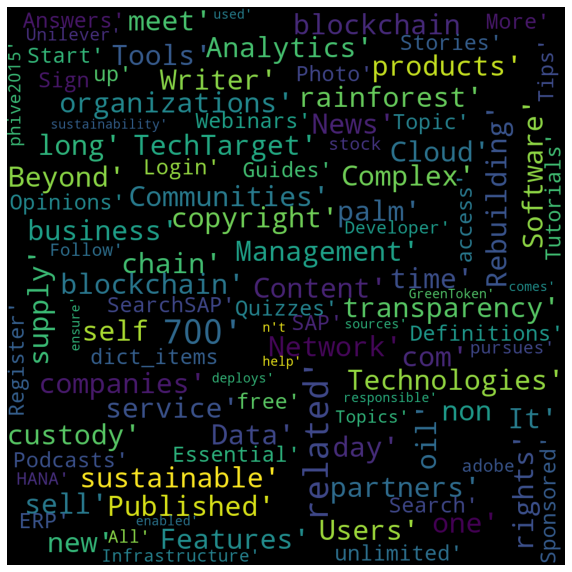

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

# Create and generate a word cloud image

####

#Create the wordcloud object
wordcloud = WordCloud(width =1000, height= 1000, margin = 0, max_font_size=60, max_words =100).generate(str(text_items))
#set figure size
plt.figure(figsize=(10, 20))
#show image
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

